In [38]:
import sympy as sym
from IPython.display import display, Math, Latex

In [39]:
r,theta,z = sym.symbols('r,theta,z')

In [40]:
sigma_rr = sym.Function('sigma_rr')(r)
sigma_tt = sym.Function('sigma_tt')(r)
sigma_zz = sym.Function('sigma_zz')(r)
E,nu = sym.symbols('E,nu')
r_o,r_i,p_o,p_i = sym.symbols('r_o,r_i,p_o,p_i')

In [41]:
sigma_rr = sym.factor(-p_i*r_i**2/(r_i**2 - r_o**2) + p_o*r_o**2/(r_i**2 - r_o**2) + (p_i*r_i**2*r_o**2/(r_i**2 - r_o**2) - p_o*r_i**2*r_o**2/(r_i**2 - r_o**2))/r**2)
sigma_tt = sym.factor(-p_i*r_i**2/(r_i**2 - r_o**2) + p_o*r_o**2/(r_i**2 - r_o**2) + (-p_i*r_i**2*r_o**2/(r_i**2 - r_o**2) + p_o*r_i**2*r_o**2/(r_i**2 - r_o**2))/r**2)
sigma_zz = sym.factor(-2*nu*p_i*r_i**2/(r_i**2 - r_o**2) + 2*nu*p_o*r_o**2/(r_i**2 - r_o**2))
display(sigma_rr,sigma_tt,sigma_zz)

-(p_i*r**2*r_i**2 - p_i*r_i**2*r_o**2 - p_o*r**2*r_o**2 + p_o*r_i**2*r_o**2)/(r**2*(r_i - r_o)*(r_i + r_o))

-(p_i*r**2*r_i**2 + p_i*r_i**2*r_o**2 - p_o*r**2*r_o**2 - p_o*r_i**2*r_o**2)/(r**2*(r_i - r_o)*(r_i + r_o))

-2*nu*(p_i*r_i**2 - p_o*r_o**2)/((r_i - r_o)*(r_i + r_o))

In [42]:
sigma_rr = sigma_rr.subs(p_o,0).simplify()
sigma_tt = sigma_tt.subs(p_o,0).simplify()
sigma_zz = sigma_zz.subs(p_o,0).simplify()
display(sigma_rr,sigma_tt,sigma_zz)

p_i*r_i**2*(-r**2 + r_o**2)/(r**2*(r_i - r_o)*(r_i + r_o))

p_i*r_i**2*(-r**2 - r_o**2)/(r**2*(r_i - r_o)*(r_i + r_o))

-2*nu*p_i*r_i**2/((r_i - r_o)*(r_i + r_o))

In [43]:
sigma_rr_thinwalled = -p_i
sigma_tt_thinwalled = p_i*r_i/(r_o-r_i)
display(sigma_rr_thinwalled,sigma_tt_thinwalled)


-p_i

p_i*r_i/(-r_i + r_o)

In [44]:
#Case1
sigma_rr1 = sigma_rr.subs([[r_o,1.1*r_i],[r,r_i]]).simplify()
sigma_tt1 = sigma_tt.subs([[r_o,1.1*r_i],[r,r_i]]).simplify()
sigma_rr_thinwalled1 = sigma_rr_thinwalled.subs(r_o,1.1*r_i).simplify()
sigma_tt_thinwalled1 = sigma_tt_thinwalled.subs(r_o,1.1*r_i).simplify()
display(sigma_rr1,sigma_tt1,sigma_rr_thinwalled1,sigma_tt_thinwalled1)


-1.0*p_i

10.5238095238095*p_i

-p_i

9.99999999999999*p_i

In [45]:
#case2
sigma_rr2 = sigma_rr.subs(r_o,5*r_i).simplify()
sigma_tt2 = sigma_tt.subs(r_o,5*r_i).simplify()
sigma_rr_thinwalled2 = sigma_rr_thinwalled.subs(r_o,5*r_i).simplify()
sigma_tt_thinwalled2 = sigma_tt_thinwalled.subs(r_o,5*r_i).simplify()
display(sigma_rr2,sigma_tt2,sigma_rr_thinwalled2,sigma_tt_thinwalled2)

p_i*(r**2 - 25*r_i**2)/(24*r**2)

p_i*(r**2 + 25*r_i**2)/(24*r**2)

-p_i

p_i/4

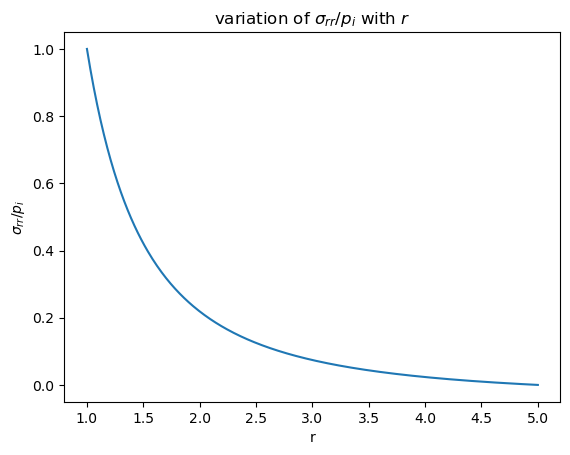

In [46]:
import matplotlib.pyplot as plt
import numpy as np
sigma_norm = sym.Function('sigma_norm')(r)
sigma_norm = sym.Abs((sigma_rr2.subs(r_i,1))/p_i)
sigma_rr_func = sym.lambdify(r, sigma_norm, 'numpy')
r_vals = np.linspace(1, 5, 400)
plt.plot(r_vals, sigma_rr_func(r_vals))
plt.xlabel('r')
plt.ylabel(r'$\sigma_{rr}/p_{i}$')
plt.title(r'variation of $\sigma_{rr}/p_{i}$ with $r$')
plt.show()
